<a href="https://colab.research.google.com/github/hieuledinh/Pneumonia-Detection-with-Deep-Learning-using-CNNs/blob/main/validation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install texttable

In [ ]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

from texttable import Texttable

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D, \
    Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

DATA_DIR_VAL = '/content/drive/MyDrive/pneumonia_data/chest_xray/chest_xray'
TRAINING_DATA_DIR_VAL = DATA_DIR_VAL + '/train /'
TEST_DATA_DIR_VAL = DATA_DIR_VAL + '/test /'
VAL_DATA_DIR_VAL = DATA_DIR_VAL + '/val/'


In [ ]:
# counting the number of images for every dataset and the associated two classes (Normal and Pneumonia)
def count_images(directory_name, detection_class):
    return len(os.listdir(directory_name + detection_class))

t = Texttable()

t.add_rows([['Dataset Type', 'Normal', 'Pneumonia'],
            ['Training', count_images(TRAINING_DATA_DIR_VAL, 'NORMAL'), count_images(TRAINING_DATA_DIR_VAL, 'PNEUMONIA')],
            ['Test', count_images(TEST_DATA_DIR_VAL, 'NORMAL'), count_images(TEST_DATA_DIR_VAL, 'PNEUMONIA')],
            ['Validation', count_images(VAL_DATA_DIR_VAL, 'NORMAL'), count_images(VAL_DATA_DIR_VAL, 'PNEUMONIA')]
           ])
print(t.draw())

+--------------+--------+-----------+
| Dataset Type | Normal | Pneumonia |
+==============+========+===========+
| Training     | 1342   | 3876      |
+--------------+--------+-----------+
| Test         | 234    | 390       |
+--------------+--------+-----------+
| Validation   | 9      | 9         |
+--------------+--------+-----------+


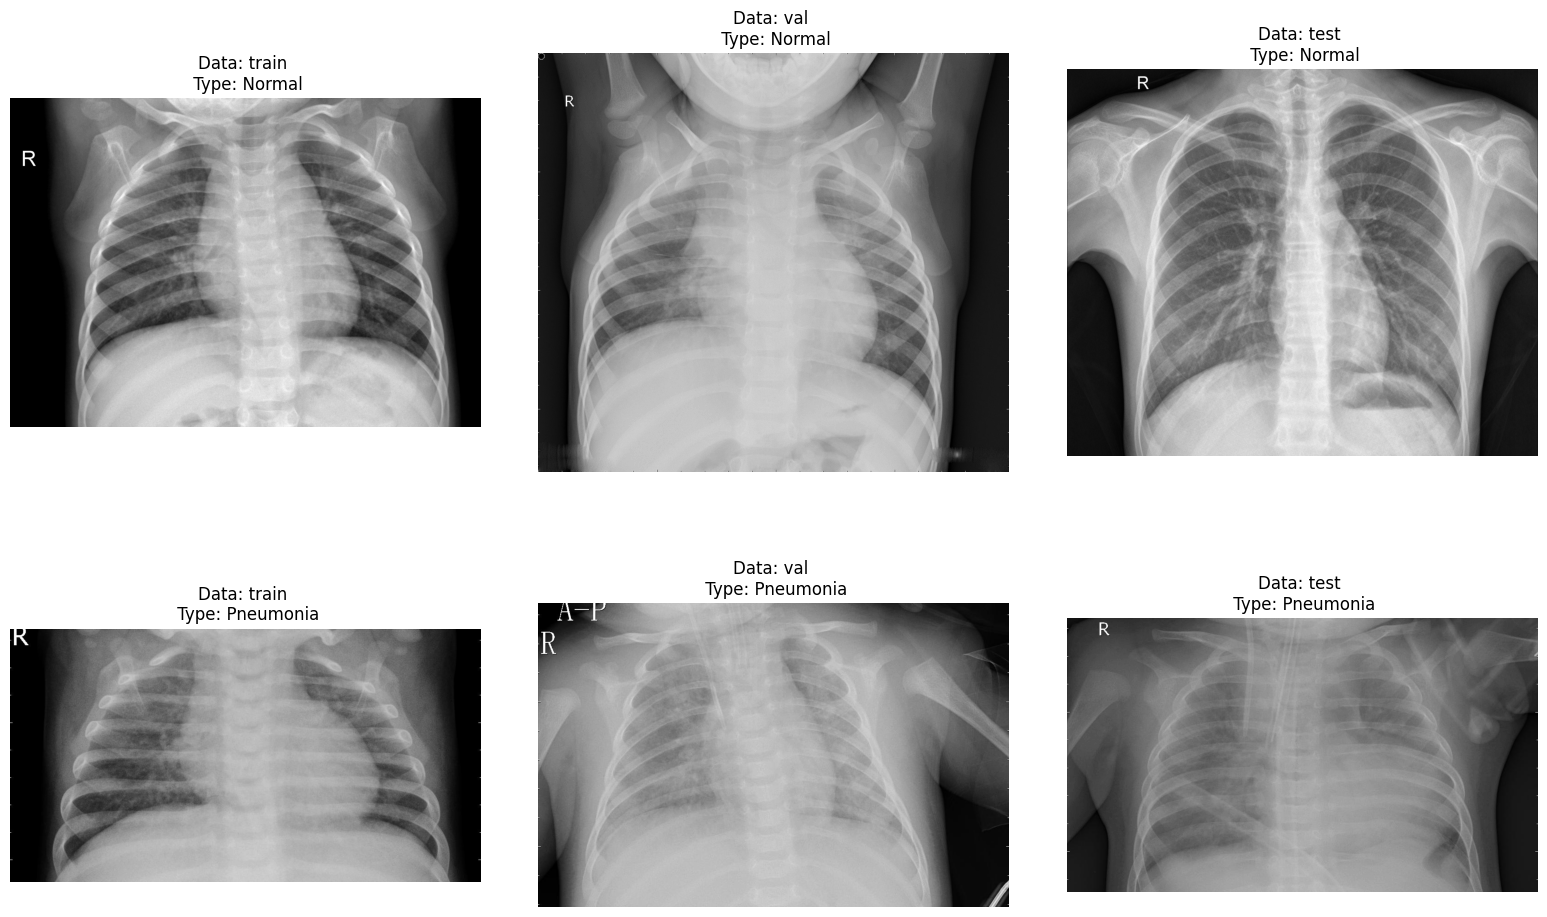

In [ ]:
# Looking at one image per class in each dataset type
fig, ax = plt.subplots(2, 3, figsize = (16, 10))
ax = ax.ravel()
plt.tight_layout()

for i, subdir in enumerate(['train', 'val', 'test']):
    image_path = DATA_DIR_VAL + subdir
    ax[i].imshow(plt.imread(image_path + '/NORMAL/' + os.listdir(image_path + '/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Data: {} \n Type: Normal'.format(subdir), fontsize = 12)
    ax[i].axis('off')
    ax[i+3].imshow(plt.imread(image_path + '/PNEUMONIA/' + os.listdir(image_path + '/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Data: {} \n Type: Pneumonia'.format(subdir), fontsize = 12)
    ax[i+3].axis('off')

In [ ]:
cnn_model = load_model("/content/drive/MyDrive/pneumonia_data/model_data/pneumonia_detection_cnn_model_data.h5")

In [ ]:
DETECTION_CLASSES = ('NORMAL', 'PNEUMONIA')

In [ ]:
BATCH_SIZE = 32

In [ ]:
# data generator on training dataset, data augmentation applied
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# preprocessing the training dataset
training_dataset = train_datagen.flow_from_directory(TRAINING_DATA_DIR_VAL,
                                                     classes=DETECTION_CLASSES,
                                                     shuffle=False,
                                                      batch_size=BATCH_SIZE,
                                                     target_size=(224, 224))

# data generator on test dataset, data augmentation not applied
# used as validation dataset as the val dir contains only 16 images
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# preprocessing the test dataset (used as validation)
test_dataset = test_datagen.flow_from_directory(TEST_DATA_DIR_VAL,
                                                classes=DETECTION_CLASSES,
                                                shuffle=False,
                                                batch_size=BATCH_SIZE,
                                                target_size=(224, 224))

# data generator on validation dataset, data augmentation not applied
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# preprocessing the validation dataset
val_dataset = test_datagen.flow_from_directory(VAL_DATA_DIR_VAL,
                                               classes=DETECTION_CLASSES,
                                               target_size=(224, 224))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
DATA_DIR = '/content/drive/MyDrive/pneumonia_data/data_chest_xray/'
TRAINING_DATA_DIR = DATA_DIR + '/train/'
TEST_DATA_DIR = DATA_DIR + '/test/'
VAL_DATA_DIR = DATA_DIR + '/val/'

In [ ]:
# counting the number of images for every dataset and the associated two classes (Normal and Pneumonia)
def count_images(directory_name, detection_class):
    return len(os.listdir(directory_name + detection_class))

t = Texttable()

t.add_rows([['Dataset Type', 'Normal', 'Pneumonia'],
            ['Training', count_images(TRAINING_DATA_DIR, 'NORMAL'), count_images(TRAINING_DATA_DIR, 'PNEUMONIA')],
            ['Test', count_images(TEST_DATA_DIR, 'NORMAL'), count_images(TEST_DATA_DIR, 'PNEUMONIA')],
            ['Validation', count_images(VAL_DATA_DIR, 'NORMAL'), count_images(VAL_DATA_DIR, 'PNEUMONIA')]
           ])
print(t.draw())

+--------------+--------+-----------+
| Dataset Type | Normal | Pneumonia |
+==============+========+===========+
| Training     | 1106   | 3392      |
+--------------+--------+-----------+
| Test         | 317    | 971       |
+--------------+--------+-----------+
| Validation   | 160    | 486       |
+--------------+--------+-----------+


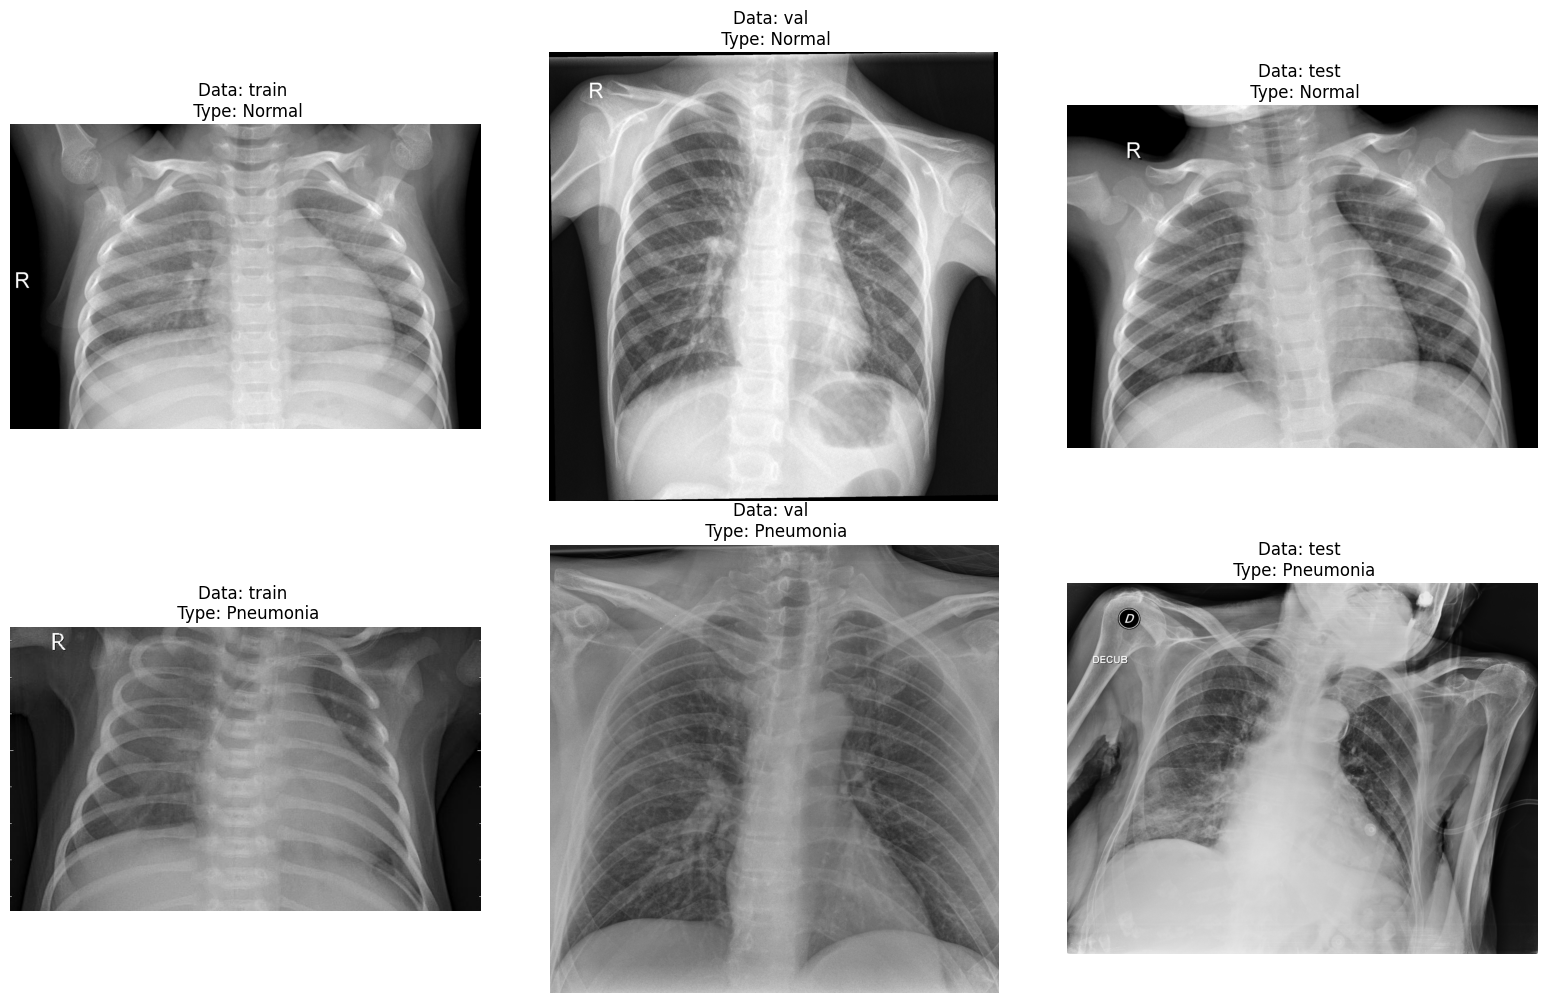

In [ ]:
# Looking at one image per class in each dataset type
fig, ax = plt.subplots(2, 3, figsize = (16, 10))
ax = ax.ravel()
plt.tight_layout()

for i, subdir in enumerate(['train', 'val', 'test']):
    image_path = DATA_DIR + subdir
    ax[i].imshow(plt.imread(image_path + '/NORMAL/' + os.listdir(image_path + '/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Data: {} \n Type: Normal'.format(subdir), fontsize = 12)
    ax[i].axis('off')
    ax[i+3].imshow(plt.imread(image_path + '/PNEUMONIA/' + os.listdir(image_path + '/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Data: {} \n Type: Pneumonia'.format(subdir), fontsize = 12)
    ax[i+3].axis('off')

In [ ]:
# data generator on training dataset, data augmentation applied
train_datagen_org = ImageDataGenerator(rescale=1.0 / 255.0,
                                   shear_range=0.2,
                                   vertical_flip=True,
                                   rotation_range=10,
                                   zoom_range=0.3)

# preprocessing the training dataset
training_dataset_org = train_datagen_org.flow_from_directory(TRAINING_DATA_DIR,
                                                     classes=DETECTION_CLASSES,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(224, 224))

# data generator on test dataset, data augmentation not applied
# used as validation dataset as the val dir contains only 16 images
test_datagen_org = ImageDataGenerator(rescale=1.0 / 255.0)

# preprocessing the test dataset (used as validation)
test_dataset_org = test_datagen_org.flow_from_directory(TEST_DATA_DIR,
                                                classes=DETECTION_CLASSES,
                                                shuffle=False,
                                                batch_size=BATCH_SIZE,
                                                target_size=(224, 224))

# data generator on validation dataset, data augmentation not applied
val_datagen_org = ImageDataGenerator(rescale=1.0 / 255.0)

# preprocessing the validation dataset
val_dataset_org = val_datagen_org.flow_from_directory(VAL_DATA_DIR,
                                               classes=DETECTION_CLASSES,
                                               shuffle=False,
                                               batch_size=BATCH_SIZE,
                                               target_size=(224, 224))

Found 4498 images belonging to 2 classes.
Found 1288 images belonging to 2 classes.
Found 646 images belonging to 2 classes.


In [ ]:
evaluation = cnn_model.evaluate(test_dataset)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cnn_model.evaluate(val_dataset)
print(f"Val Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 34s 2s/step - loss: 0.2830 - accuracy: 0.8894
Test Accuracy: 88.94%
1/1 [==============================] - 1s 804ms/step - loss: 0.8828 - accuracy: 0.5000
Val Accuracy: 50.00%


In [ ]:
# Khong rescale sai so kha lon

In [ ]:
evaluation = cnn_model.evaluate(test_dataset)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cnn_model.evaluate(val_dataset)
print(f"Val Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 37s 2s/step - loss: 0.2830 - accuracy: 0.8894
Test Accuracy: 88.94%
1/1 [==============================] - 1s 882ms/step - loss: 0.8828 - accuracy: 0.5000
Val Accuracy: 50.00%


In [ ]:
evaluation_val = cnn_model.evaluate(test_dataset)
print(f"Test_val Accuracy: {evaluation_val[1] * 100:.2f}%")

evaluation_val = cnn_model.evaluate(training_dataset)
print(f"Train_val Accuracy: {evaluation_val[1] * 100:.2f}%")

20/20 [==============================] - 85s 4s/step - loss: 0.2830 - accuracy: 0.8894
Test_val Accuracy: 88.94%
163/163 [==============================] - 1647s 10s/step - loss: 0.1517 - accuracy: 0.9448
Train_val Accuracy: 94.48%


In [ ]:
evaluation_test_org = cnn_model.evaluate(test_dataset_org)
print(f"Test_val Accuracy: {evaluation_test_org[1] * 100:.2f}%")

evaluation_train_org = cnn_model.evaluate(training_dataset_org)
print(f"Train_val Accuracy: {evaluation_train_org[1] * 100:.2f}%")

evaluation_val_org = vgg16_model.evaluate(val_dataset_org)
print(f"Val_val Accuracy: {evaluation_val_org[1] * 100:.2f}%")

41/41 [==============================] - 390s 10s/step - loss: 0.2155 - accuracy: 0.9053
Test_val Accuracy: 90.53%
141/141 [==============================] - 1460s 10s/step - loss: 0.1853 - accuracy: 0.9226
Train_val Accuracy: 92.26%


NameError: name 'vgg16_model' is not defined

In [ ]:
evaluation_val_org = cnn_model.evaluate(val_dataset_org)
print(f"Val_val Accuracy: {evaluation_val_org[1] * 100:.2f}%")

21/21 [==============================] - 200s 10s/step - loss: 0.2213 - accuracy: 0.9025
Val_val Accuracy: 90.25%


In [ ]:
# storing the true classes of the test dataset
y_true_cnn = test_dataset.classes

# predicting the classes of the test dataset
y_pred_cnn = cnn_model.predict(test_dataset, steps=len(test_dataset), verbose=1)

# Storing the predicted probability
y_pred_prob_cnn = y_pred_cnn[:, 1]

# Storing the binary classes for the predictions
y_pred_binary_cnn = y_pred_prob_cnn > 0.5

20/20 [==============================] - 116s 6s/step


In [ ]:
y_true_cnn = training_dataset.classes

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
classification_report, roc_auc_score, roc_curve

In [ ]:
# confusion matrix for test dataset
print('\nConfusion Matrix for Test Dataset\n -------------------------')
cm_cnn = confusion_matrix(y_true_cnn, y_pred_binary_cnn)
print(cm_cnn)


Confusion Matrix for Test Dataset
 -------------------------
[[183  51]
 [ 18 372]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset CNN model')

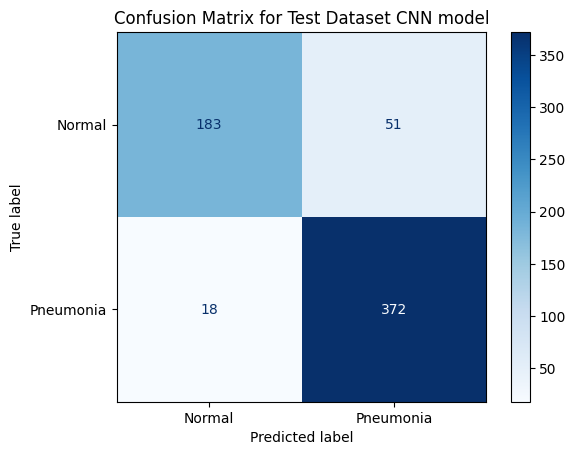

In [ ]:
cm_display_cnn = ConfusionMatrixDisplay(cm_cnn, display_labels=['Normal', 'Pneumonia'])
cm_display_cnn.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Test Dataset CNN model')

In [ ]:
print('\nClassification Report\n -------------------------')
print(classification_report(y_true_cnn, y_pred_binary_cnn))


Classification Report
 -------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       234
           1       0.88      0.95      0.92       390

    accuracy                           0.89       624
   macro avg       0.89      0.87      0.88       624
weighted avg       0.89      0.89      0.89       624



In [ ]:
# ROC AUC
auc = roc_auc_score(y_true_cnn, y_pred_prob_cnn)
print(f'ROC AUC (Test Dataset) {auc:.2}')

ROC AUC (Test Dataset) 0.96


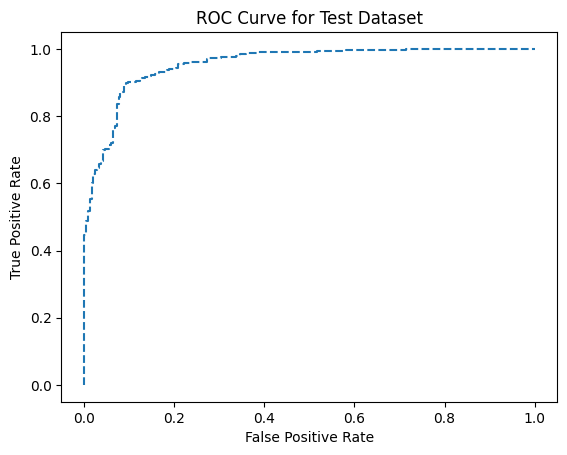

In [ ]:
# calculate roc curves
fpr_cnn, tpr_cnn, _ = roc_curve(y_true_cnn, y_pred_prob_cnn)

# plot the roc curve for the model
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Dataset')
plt.show()

In [ ]:
# confusion matrix for test dataset
print('\nConfusion Matrix for Test Dataset\n -------------------------')
cm_cnn = confusion_matrix(y_true_cnn, y_pred_binary_cnn)
print(cm_cnn)


Confusion Matrix for Test Dataset
 -------------------------
[[287  30]
 [ 92 879]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset CNN model')

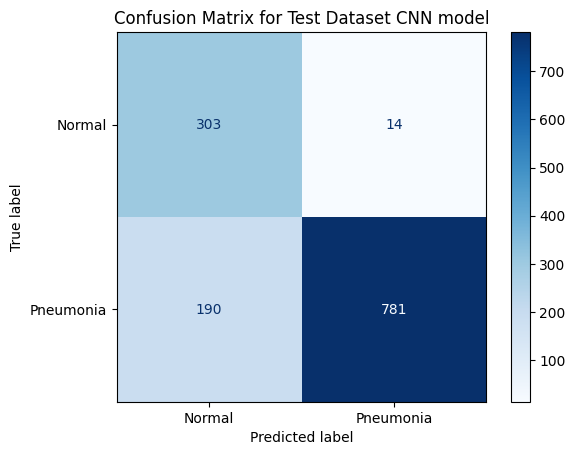

In [ ]:
cm_display_cnn = ConfusionMatrixDisplay(cm_cnn, display_labels=['Normal', 'Pneumonia'])
cm_display_cnn.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Test Dataset CNN model')

In [ ]:
# confusion matrix for test dataset
print('\nConfusion Matrix for Test Dataset\n -------------------------')
cm_cnn = confusion_matrix(y_true_cnn, y_pred_binary_cnn)
print(cm_cnn)


Confusion Matrix for Test Dataset
 -------------------------
[[287  30]
 [ 92 879]]


In [ ]:
vgg16_model = load_model("/content/drive/MyDrive/pneumonia_data/model_data/vgg16_2_model_data(20epochs).h5")

In [ ]:
evaluation_vgg16_test = vgg16_model.evaluate(test_dataset)
print(f"Test_val Accuracy: {evaluation_vgg16_test[1] * 100:.2f}%")

evaluation_vgg16_train = vgg16_model.evaluate(training_dataset)
print(f"Train_val Accuracy: {evaluation_vgg16_train[1] * 100:.2f}%")

20/20 [==============================] - 17s 527ms/step - loss: 0.3707 - accuracy: 0.8205
Test_val Accuracy: 82.05%
163/163 [==============================] - 66s 401ms/step - loss: 0.4815 - accuracy: 0.7972
Train_val Accuracy: 79.72%


In [ ]:
evaluation_vgg16_test_org = vgg16_model.evaluate(test_dataset_org)
print(f"Test_val Accuracy: {evaluation_vgg16_test_org[1] * 100:.2f}%")

evaluation_vgg16_train_org = vgg16_model.evaluate(training_dataset_org)
print(f"Train_val Accuracy: {evaluation_vgg16_train_org[1] * 100:.2f}%")

evaluation_vgg16_val_org = vgg16_model.evaluate(val_dataset_org)
print(f"Val_val Accuracy: {evaluation_vgg16_val_org[1] * 100:.2f}%")

41/41 [==============================] - 724s 18s/step - loss: 0.5112 - accuracy: 0.8005
Test_val Accuracy: 80.05%
141/141 [==============================] - 2585s 18s/step - loss: 0.2271 - accuracy: 0.9064
Train_val Accuracy: 90.64%
21/21 [==============================] - 375s 18s/step - loss: 0.4346 - accuracy: 0.8050
Val_val Accuracy: 80.50%


In [ ]:
# storing the true classes of the test dataset
y_true_vgg = test_dataset.classes

# predicting the classes of the test dataset
y_pred_vgg = vgg16_model.predict(test_dataset, steps=len(test_dataset), verbose=1)

# Storing the predicted probability
y_pred_prob_vgg = y_pred_vgg[:, 1]

# Storing the binary classes for the predictions
y_pred_binary_vgg = y_pred_prob_vgg > 0.5

20/20 [==============================] - 573s 28s/step


In [ ]:
# confusion matrix for test dataset
print('\nConfusion Matrix for Test Dataset\n -------------------------')
cm_vgg = confusion_matrix(y_true_vgg, y_pred_binary_vgg)
print(cm_vgg)


Confusion Matrix for Test Dataset
 -------------------------
[[226   8]
 [104 286]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset VGG16 model')

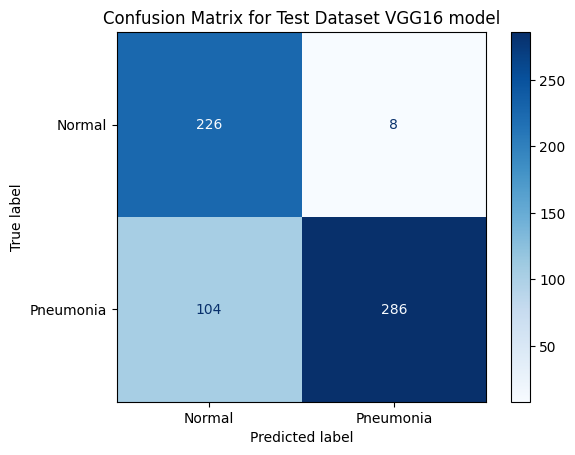

In [ ]:
cm_display_vgg = ConfusionMatrixDisplay(cm_vgg, display_labels=['Normal', 'Pneumonia'])
cm_display_vgg.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Test Dataset VGG16 model')

In [ ]:
print('\nClassification Report\n -------------------------')
print(classification_report(y_true_vgg, y_pred_binary_vgg))


Classification Report
 -------------------------
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       234
           1       0.97      0.73      0.84       390

    accuracy                           0.82       624
   macro avg       0.83      0.85      0.82       624
weighted avg       0.86      0.82      0.82       624



In [ ]:
# ROC AUC
auc_vgg = roc_auc_score(y_true_vgg, y_pred_prob_vgg)
print(f'ROC AUC (Test Dataset) {auc_vgg:.2}')

ROC AUC (Test Dataset) 0.97


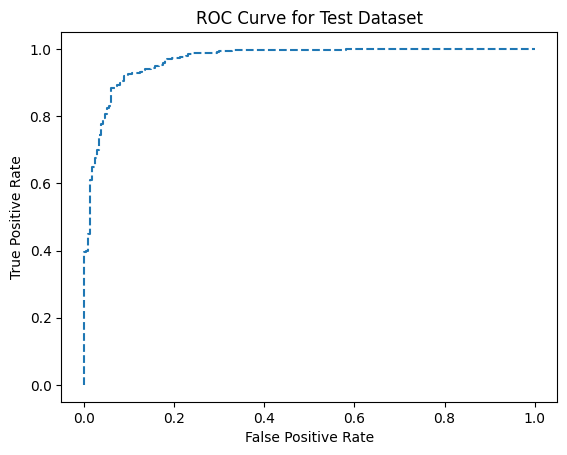

In [ ]:
# calculate roc curves
fpr_vgg, tpr_vgg, _ = roc_curve(y_true_vgg, y_pred_prob_vgg)

# plot the roc curve for the model
plt.figure()
plt.plot(fpr_vgg, tpr_vgg, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Dataset')
plt.show()

In [ ]:
resnet_model = load_model("/content/drive/MyDrive/pneumonia_data/model_data/resnet_model_data(20epochs).h5")

In [ ]:
evaluation_resnet_test = resnet_model.evaluate(test_dataset)
print(f"Test_val Accuracy: {evaluation_resnet_test[1] * 100:.2f}%")

evaluation_resnet_train = vgg16_model.evaluate(training_dataset)
print(f"Train_val Accuracy: {evaluation_resnet_train[1] * 100:.2f}%")

20/20 [==============================] - 8s 375ms/step - loss: 0.9558 - accuracy: 0.7244
Test_val Accuracy: 72.44%
163/163 [==============================] - 66s 406ms/step - loss: 0.4815 - accuracy: 0.7972
Train_val Accuracy: 79.72%


In [ ]:
evaluation_resnet_test_org = resnet_model.evaluate(test_dataset_org)
print(f"Test_val Accuracy: {evaluation_resnet_test_org[1] * 100:.2f}%")

evaluation_resnet_train_org = resnet_model.evaluate(training_dataset_org)
print(f"Train_val Accuracy: {evaluation_resnet_train_org[1] * 100:.2f}%")

evaluation_resnet_val_org = resnet_model.evaluate(val_dataset_org)
print(f"Val_val Accuracy: {evaluation_resnet_val_org[1] * 100:.2f}%")

41/41 [==============================] - 248s 6s/step - loss: 0.4302 - accuracy: 0.8634
Test_val Accuracy: 86.34%
141/141 [==============================] - 931s 7s/step - loss: 0.5801 - accuracy: 0.8148
Train_val Accuracy: 81.48%
21/21 [==============================] - 124s 6s/step - loss: 0.4291 - accuracy: 0.8529
Val_val Accuracy: 85.29%


In [ ]:
# storing the true classes of the test dataset
y_true_resnet = test_dataset.classes

# predicting the classes of the test dataset
y_pred_resnet = resnet_model.predict(test_dataset, steps=len(test_dataset), verbose=1)

# Storing the predicted probability
y_pred_prob_resnet = y_pred_resnet[:, 1]

# Storing the binary classes for the predictions
y_pred_binary_resnet = y_pred_prob_resnet > 0.5

20/20 [==============================] - 153s 7s/step


In [ ]:
# confusion matrix for test dataset
print('\nConfusion Matrix for Test Dataset\n -------------------------')
cm_resnet = confusion_matrix(y_true_resnet, y_pred_binary_resnet)
print(cm_resnet)


Confusion Matrix for Test Dataset
 -------------------------
[[ 62 172]
 [  0 390]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset ResNet50 model')

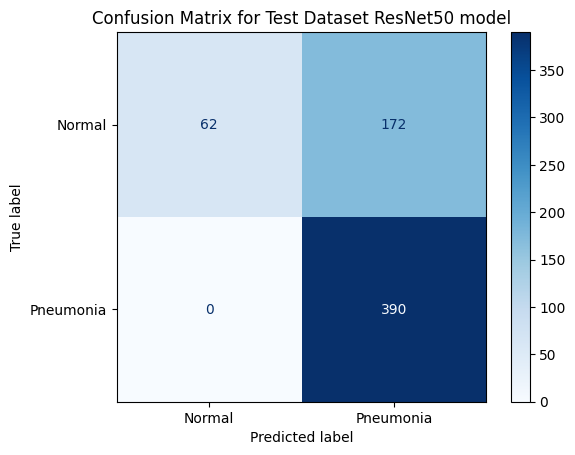

In [ ]:
cm_display_resnet = ConfusionMatrixDisplay(cm_resnet, display_labels=['Normal', 'Pneumonia'])
cm_display_resnet.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Test Dataset ResNet50 model')

In [ ]:
print('\nClassification Report\n -------------------------')
print(classification_report(y_true_resnet, y_pred_binary_resnet))


Classification Report
 -------------------------
              precision    recall  f1-score   support

           0       1.00      0.26      0.42       234
           1       0.69      1.00      0.82       390

    accuracy                           0.72       624
   macro avg       0.85      0.63      0.62       624
weighted avg       0.81      0.72      0.67       624



In [ ]:
# ROC AUC
auc_resnet = roc_auc_score(y_true_resnet, y_pred_prob_resnet)
print(f'ROC AUC (Test Dataset) {auc_resnet:.2}')

ROC AUC (Test Dataset) 0.95


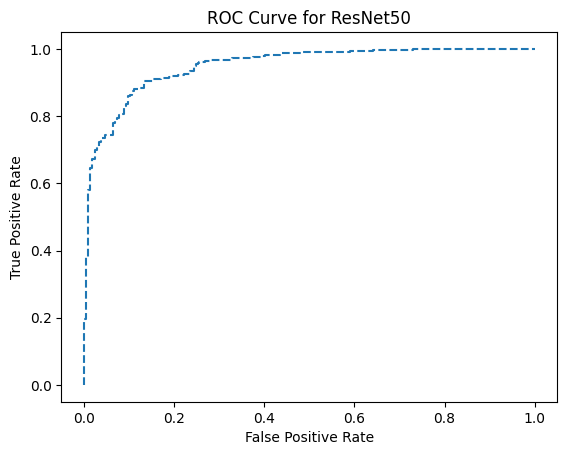

In [ ]:
# calculate roc curves
fpr_resnet, tpr_resnet, _ = roc_curve(y_true_resnet, y_pred_prob_resnet)

# plot the roc curve for the model
plt.figure()
plt.plot(fpr_resnet, tpr_resnet, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ResNet50')
plt.show()

In [ ]:
densenet_model = load_model("/content/drive/MyDrive/dense_model_data(20_3epochs).h5")

In [ ]:
evaluation_densenet_test = densenet_model.evaluate(test_dataset)
print(f"Test_val Accuracy: {evaluation_densenet_test[1] * 100:.2f}%")

evaluation_densenet_train = densenet_model.evaluate(training_dataset)
print(f"Train_val Accuracy: {evaluation_densenet_train[1] * 100:.2f}%")

20/20 [==============================] - 16s 500ms/step - loss: 0.1166 - accuracy: 0.9551
Test_val Accuracy: 95.51%
163/163 [==============================] - 67s 408ms/step - loss: 0.1061 - accuracy: 0.9628
Train_val Accuracy: 96.28%


In [ ]:
evaluation_densenet_test_org = densenet_model.evaluate(test_dataset_org)
print(f"Test_val Accuracy: {evaluation_densenet_test_org[1] * 100:.2f}%")

evaluation_densenet_train_org = densenet_model.evaluate(training_dataset_org)
print(f"Train_val Accuracy: {evaluation_densenet_train_org[1] * 100:.2f}%")

evaluation_densenet_val_org = densenet_model.evaluate(val_dataset_org)
print(f"Val_val Accuracy: {evaluation_densenet_val_org[1] * 100:.2f}%")

41/41 [==============================] - 225s 5s/step - loss: 0.1354 - accuracy: 0.9480
Test_val Accuracy: 94.80%
141/141 [==============================] - 831s 6s/step - loss: 0.1248 - accuracy: 0.9560
Train_val Accuracy: 95.60%
21/21 [==============================] - 118s 6s/step - loss: 0.1450 - accuracy: 0.9551
Val_val Accuracy: 95.51%


In [ ]:
# storing the true classes of the test dataset
y_true_dense = test_dataset.classes

# predicting the classes of the test dataset
y_pred_dense = densenet_model.predict(test_dataset, steps=len(test_dataset), verbose=1)

# Storing the predicted probability
y_pred_prob_dense = y_pred_dense[:, 1]

# Storing the binary classes for the predictions
y_pred_binary_dense = y_pred_prob_dense > 0.5

20/20 [==============================] - 143s 7s/step


In [ ]:
# confusion matrix for test dataset
print('\nConfusion Matrix for Test Dataset\n -------------------------')
cm_dense = confusion_matrix(y_true_dense, y_pred_binary_dense)
print(cm_dense)


Confusion Matrix for Test Dataset
 -------------------------
[[214  20]
 [  8 382]]


In [ ]:
# confusion matrix for test dataset
print('\nConfusion Matrix for Test Dataset\n -------------------------')
cm_dense = confusion_matrix(y_true_dense, y_pred_binary_dense)
print(cm_dense)


Confusion Matrix for Test Dataset
 -------------------------
[[214  20]
 [  8 382]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset DenseNet-121 model')

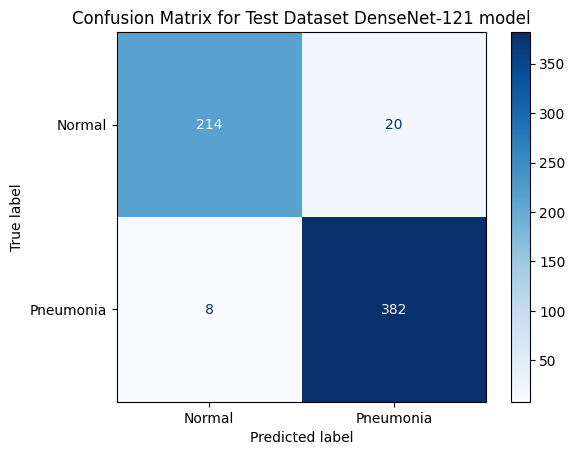

In [ ]:
cm_display_dense = ConfusionMatrixDisplay(cm_dense, display_labels=['Normal', 'Pneumonia'])
cm_display_dense.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Test Dataset DenseNet-121 model')

In [ ]:
# confusion matrix for test dataset
print('\nConfusion Matrix for Test Dataset\n -------------------------')
cm_dense = confusion_matrix(y_true_dense, y_pred_binary_dense)
print(cm_dense)


Confusion Matrix for Test Dataset
 -------------------------
[[1269   72]
 [ 122 3753]]


In [ ]:
print('\nClassification Report\n -------------------------')
print(classification_report(y_true_dense, y_pred_binary_dense))


Classification Report
 -------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       234
           1       0.95      0.98      0.96       390

    accuracy                           0.96       624
   macro avg       0.96      0.95      0.95       624
weighted avg       0.96      0.96      0.95       624



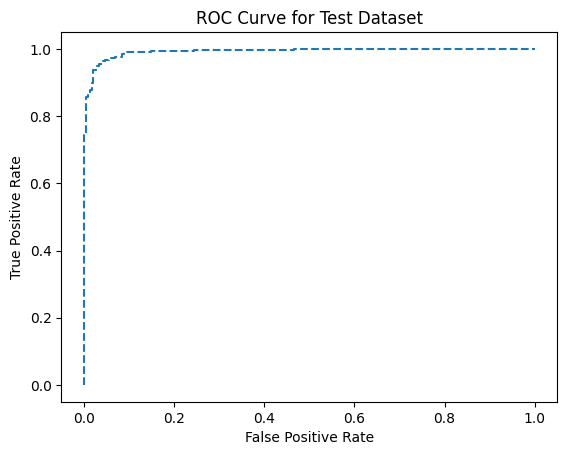

In [ ]:
# calculate roc curves
fpr_dense, tpr_dense, _ = roc_curve(y_true_dense, y_pred_prob_dense)

# plot the roc curve for the model
plt.figure()
plt.plot(fpr_dense, tpr_dense, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Dataset')
plt.show()

In [ ]:
# ROC AUC
auc_dense = roc_auc_score(y_true_dense, y_pred_prob_dense)
print(f'ROC AUC (Test Dataset) {auc_dense:.2}')

ROC AUC (Test Dataset) 0.99


In [ ]:
import numpy as np

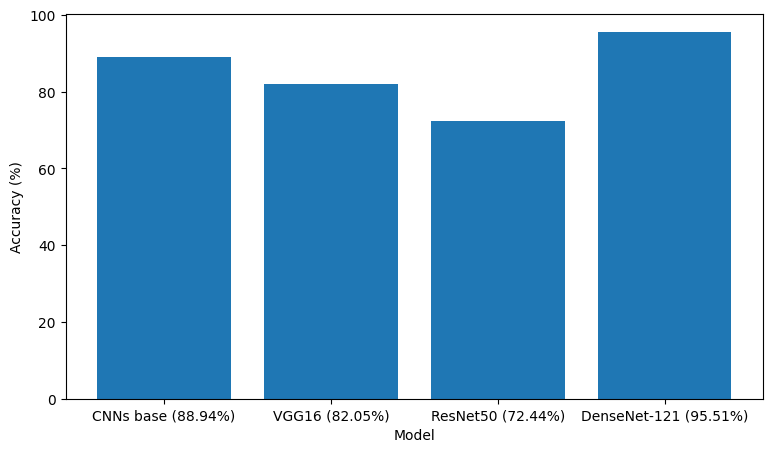

In [ ]:
f, ax = plt.subplots(figsize=(9,5))
x = np.array(['CNNs base (88.94%)','VGG16 (82.05%)','ResNet50 (72.44%)','DenseNet-121 (95.51%)'])
y = np.array([88.94,82.05,72.44,95.51])
plt.bar(x,y)
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

plt.show()

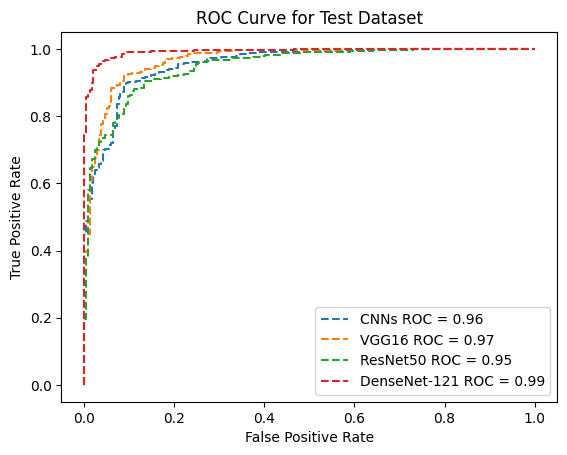

In [ ]:
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, linestyle='--', label = "CNNs ROC = 0.96")
plt.plot(fpr_vgg, tpr_vgg, linestyle='--', label = "VGG16 ROC = 0.97")
plt.plot(fpr_resnet, tpr_resnet, linestyle='--', label = "ResNet50 ROC = 0.95")
plt.plot(fpr_dense, tpr_dense, linestyle='--', label = "DenseNet-121 ROC = 0.99")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Dataset')
plt.legend(loc = "lower right")
# plt.show()